<a href="https://colab.research.google.com/github/RubyNixx/machine_learning/blob/main/3_Clustering_Extension_Elbow%2C_shilouette%2C_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

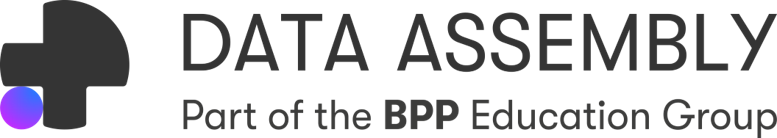

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further



<a name="contents"></a>
## Contents

<br>1. [Problem Introduction and Data Exploration](#section_1)
<br>2. [K-Means Clustering](#section_2)
<br>3. [Hierarchical Clustering - Agglomerative](#section_3)
<br>4. [Density-Based Spatial Clustering](#section_4)


<h2><font color="#AA00BB">Welcome to our workbook on Clustering!</font></h2>

Welcome to this topic on clustering techniques! Clustering is an unsupervised learning method for grouping unlabelled data based on similarities. It is a key technique for Exploratory Data Analysis (EDA), allowing us to uncover hidden patterns and extract insights from complex datasets.



Once completed, you will have the knowledge and skills to leverage clustering methodologies to segment customers, detect anomalies, identify relationships, and derive actionable insights from unlabelled data.

Let's get started!

<a name="section_1"></a>

# **1. Problem Introduction and Data Exploration**


[Return to contents](#contents)

```
# This is formatted as code
```



This dataset, titled **"Mall Customers,**" offers an insight into the shopping behaviours and demographic details of customers at a mall, including data on:
- customer ID
- gender
- age
- annual income
- spending score.

We shall treat this as a simple **clustering challenge**, aiming to segment customers into distinct groups based on their attributes. This segmentation will allow us to uncover patterns within the customer base, facilitating targeted marketing strategies. Our investigation will focus on identifying natural clusters, understanding how various characteristics influence customer grouping, and determining the optimal number of clusters for efficient categorisation.

### **1.1 Let's explore our data**

First we import our libraries that we'll be using for this analysis.

In [ ]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


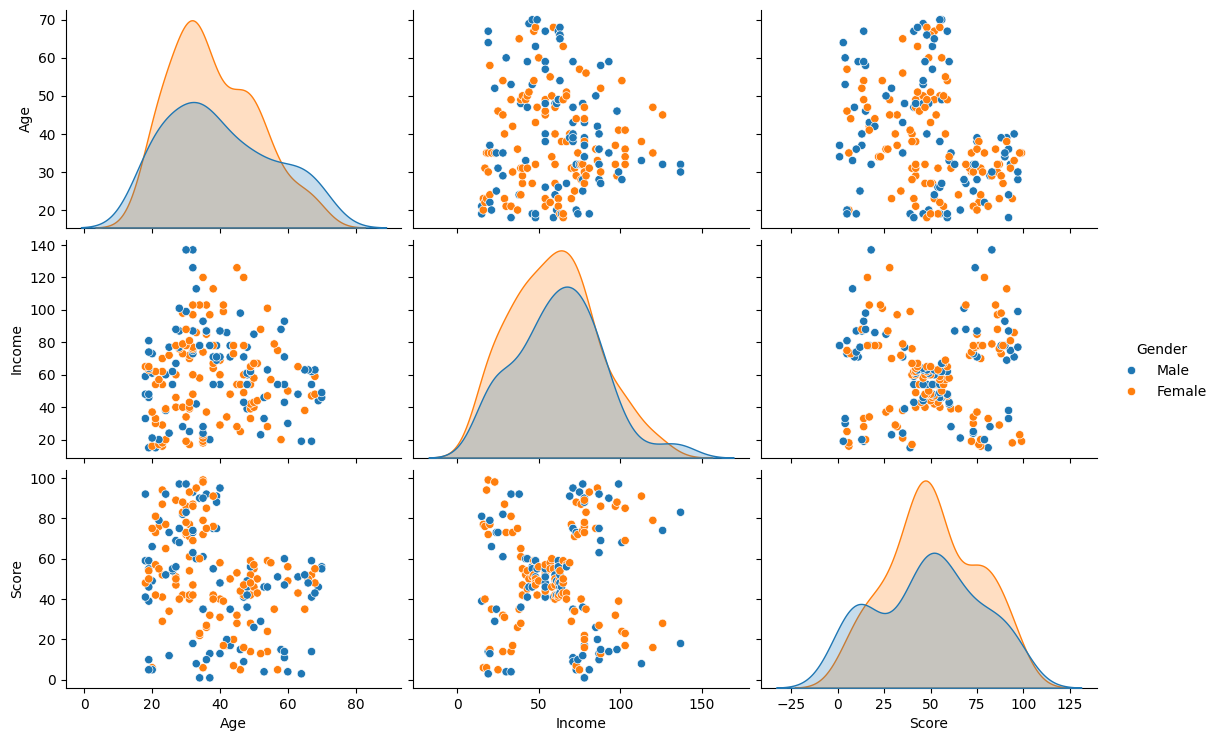

In [ ]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

## ⌨️**Exercise**

1. Can you see any clusters in the data yet after this intial exploration?

<a name="section_2"></a>

# **2. K-Means Clusttering**


[Return to contents](#contents)

We will employ the K-means clustering algorithm to segment the "Mall Customers" dataset, leveraging its efficiency in grouping data into distinct clusters based on shopping behavior and demographic characteristics. This approach is chosen for its simplicity and effectiveness in identifying patterns and natural groupings within complex datasets.




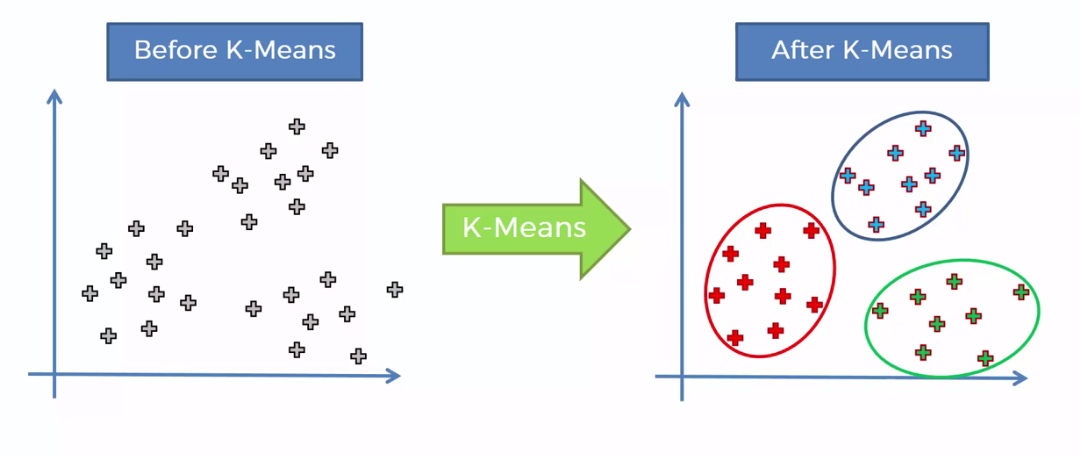

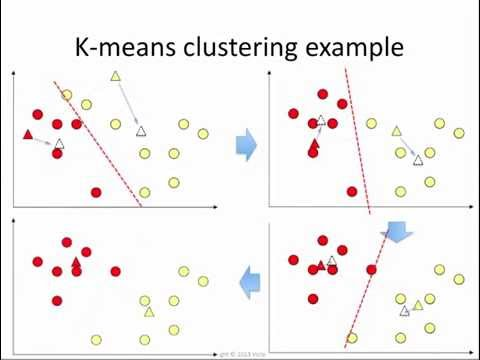

### **2.1 Choosing K - Elbow method**

The **elbow method** is a technique used to determine the optimal number of clusters (k) for K-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. WCSS measures the variance within each cluster, and as k increases, WCSS naturally decreases because the clusters are smaller and tighter. The goal is to identify the point on the plot where the decrease in WCSS begins to slow down, indicating diminishing returns in variance reduction for each additional cluster. This point resembles an "elbow" on the curve, hence the name. Choosing the number of clusters at the "elbow" strikes a balance between minimising WCSS and avoiding overfitting by creating too many clusters.

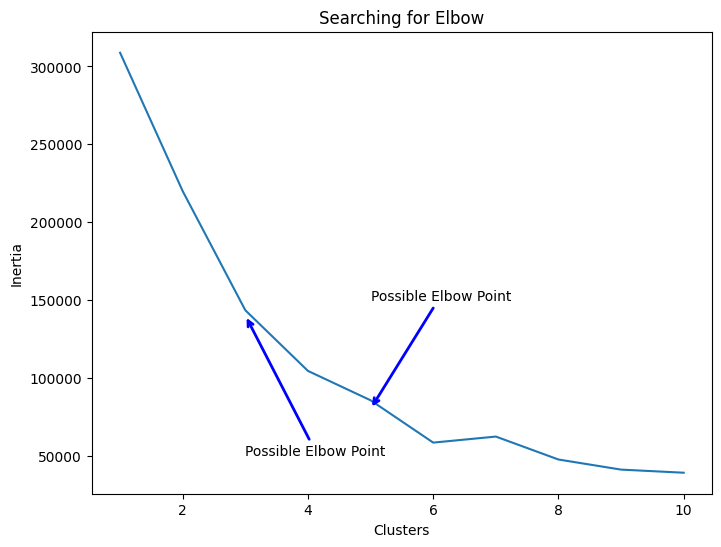

In [ ]:
# Import KMeans clustering from sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a list to store the inertia values for different numbers of clusters
clusters = []

# Loop through 1 to 10 clusters to find the optimal number
for i in range(1, 11):
    # Fit KMeans with i clusters to the data X
    km = KMeans(n_clusters=i).fit(X)
    # Append the inertia (sum of squared distances to the nearest cluster center) to the list
    clusters.append(km.inertia_)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))
# Plot the number of clusters against their corresponding inertia values
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
# Set the title of the plot
ax.set_title('Searching for Elbow')
# Label the x-axis as 'Clusters'
ax.set_xlabel('Clusters')
# Label the y-axis as 'Inertia'
ax.set_ylabel('Inertia')

# Annotate the plot with a possible elbow point at 3 clusters
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Annotate the plot with another possible elbow point at 5 clusters
ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Display the plot
plt.show()

### **2.2 Interpreting the Elbow point from our plot**

We're interpreting the elbow plot to select the optimal 'k' for K-means clustering. The plot shows the inertia decreasing as the number of clusters increases. The "elbow" points, where the rate of decrease sharply changes, suggest potential candidates for 'k'. Here, the annotations indicate possible elbows at 3 and 5 clusters.

Choosing 'k' at an elbow point is a trade-off between inertia and the number of clusters. The first annotated point at 3 clusters is a strong candidate, as it represents the most significant bend in the inertia plot, implying substantial structure found within the data. The second point at 5 clusters also shows a bend, but less pronounced, which could be suitable if a finer segmentation is needed.

As a rule of thumb, we aim to choose the smallest 'k' that still has a low inertia, providing a balance between cluster compactness and model simplicity. Here, 3 may be the more parsimonious choice, offering a simpler model with adequately distinct clusters.

#### **Visualising our clusters with K=3**

Text(0.5, 1.0, 'KMeans with 3 Clusters')

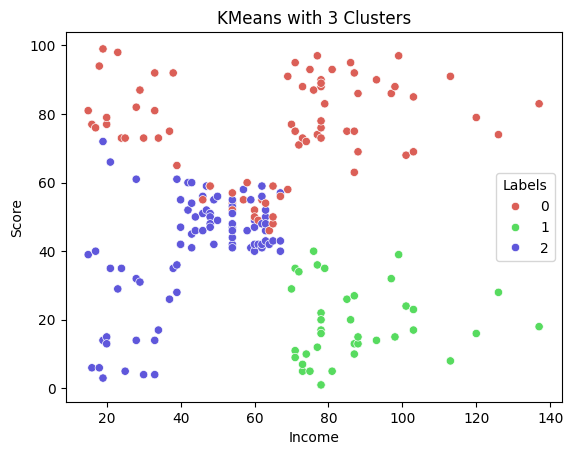

In [ ]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

# Assuming km3 is your KMeans model and X is your data with 'Income' and 'Score' columns
# Ensure you've already fitted your model with km3.fit() before this step
X['Labels'] = km3.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')

#### **Visualising our clusters with K=5**

Text(0.5, 1.0, 'KMeans with 5 Clusters')

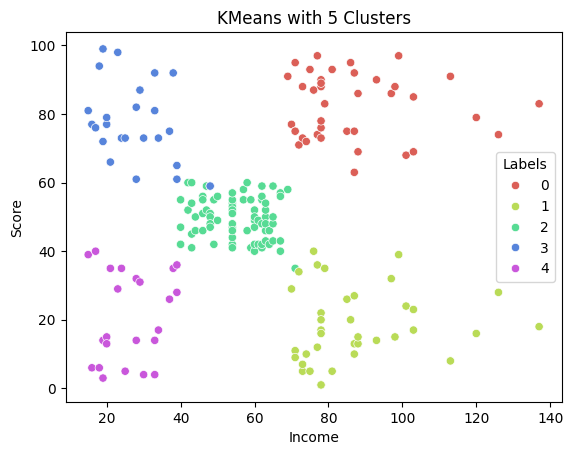

In [ ]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(X)

# Assuming km5 is your KMeans model and X is your data with 'Income' and 'Score' columns
# Ensure you've already fitted your model with km3.fit() before this step
X['Labels'] = km5.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')

### **Interpreting and comparing K=3 and K=5**

When examining the KMeans clustering results for k=3 versus k=5, there is a noticeable difference in the data segmentation. With k=3, the clusters are more inclusive, capturing a larger variance within each group. This level of clustering is good for broad market strategies as it delineates customer groups with clear distinctions based on income and spending scores.

In contrast, k=5 offers a finer breakdown, potentially revealing more intricate patterns within the consumer base. This could be beneficial for targeted marketing tactics. However, the clusters here are less distinct, especially in the middle-income brackets, which may suggest subtler differences between customer segments. These could be important for tailored marketing approaches but might require more effort to effectively differentiate and manage.

The decision between k=3 and k=5 should align with the analytical objectives: k=3 for general segmentation and k=5 for deeper, more detailed insights, while considering the increased complexity and potential cluster overlap.

### **2.3 Using the Silhouette Method**

The silhouette plot is a graphical tool to assess the consistency within clusters of data. For each point, it measures how similar that point is to points in its own cluster versus points in the nearest cluster. The silhouette score ranges from -1 to 1, where a high score indicates that the point is well matched to its own cluster and poorly matched to neighbouring clusters. If most objects have a high value, this indicates that the clustering configuration is appropriate. If many points have a low or negative value, the clustering configuration may have too many or too few clusters. This plot is especially useful when validating the efficiency of K-means clustering by providing a clear visual representation of how well each object lies within its cluster.

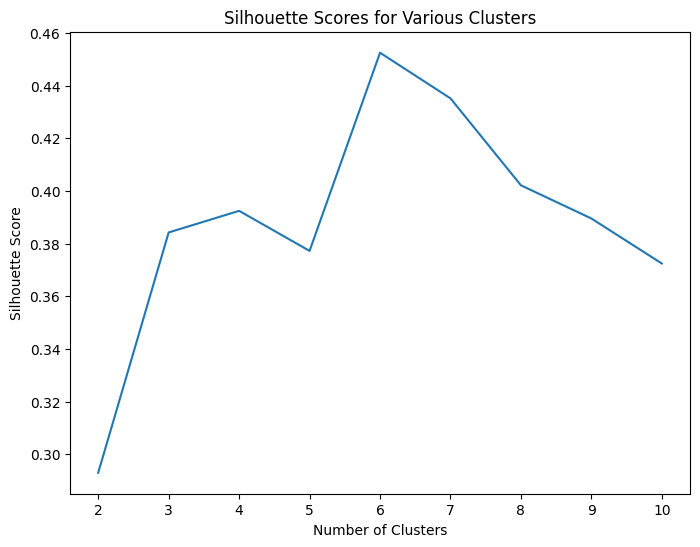

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your data set

silhouette_scores = []

# Calculate silhouette scores for different number of clusters
for i in range(2, 11):
    km = KMeans(n_clusters=i).fit(X)
    labels = km.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plotting the silhouette scores
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(2, 11)), y=silhouette_scores, ax=ax)
ax.set_title('Silhouette Scores for Various Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

plt.show()

### **2.4 Interpreting the Silhoutte Plot**


The silhouette plot above shows the silhouette scores for different numbers of clusters, ranging from 2 to 10. A higher silhouette score indicates that, on average, points are more appropriately grouped in their respective clusters.

From the plot, we can see that the silhouette score peaks at 5 clusters, suggesting that this number of clusters is optimal according to the silhouette method. This peak indicates that the clusters are well separated from each other and dense, which implies that the data points are closer to their own cluster center than to centers of other clusters.

After the peak at 5, the silhouette score tends to decrease as the number of clusters increases, which typically means that additional clusters might be forcing data points into less cohesive or less well-separated groupings. Thus, the silhouette analysis would suggest that 5 is the optimal number of clusters for this particular dataset, aligning with our earlier observations from the elbow method.

## ⌨️**Exercise**

1. Create plots for k=6 and compare with the previous plots of k=3 and k=5.
2. Choose a k and justify your choice, and interpretation of the clusters to a non-technical stakeholder.

---

<a name="section_3"></a>

# **3. Hierarchical Clustering - Agglomerative**


[Return to contents](#contents)


Following our exploration of K-means clustering, let's now turn to another clustering technique called Agglomerative Hierarchical Clustering. This method adopts a bottom-up approach, where each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy. Agglomerative clustering is often preferred over its counterpart, Divisive clustering, due to its simplicity and ease of interpretation.

In this session, we'll utilise Complete Linkage as our linkage criterion. This means that when deciding which clusters to merge, we consider the maximum distance between data points in different clusters; we then combine the clusters where this maximum distance is smallest.

To apply Agglomerative Clustering, we primarily need to specify two parameters:

- **n_clusters**: This defines the number of clusters and centroids we aim to end up with.
- **linkage**: This determines the distance metric used between data points in different clusters. While we'll use 'complete' linkage initially, it's also beneficial to experiment with 'average' linkage to compare results.

This method provides a visual tree structure called a dendrogram, which helps in understanding the data's hierarchical structure and deciding the number of clusters by cutting the dendrogram at the appropriate level.

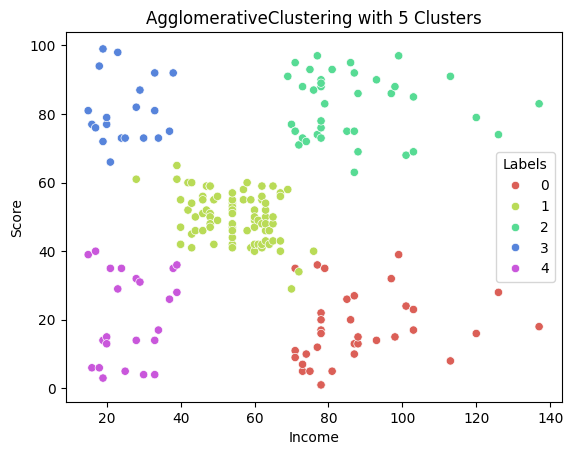

In [ ]:
# Import the AgglomerativeClustering class from sklearn's cluster module
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the AgglomerativeClustering model with 5 clusters using 'average' linkage
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

# Assign the cluster labels to a new column in our dataset X
X['Labels'] = agglom.labels_

# Plot the data points with Seaborn's scatterplot method, colouring by the cluster labels
# 'hls' is used as the colour palette with 5 distinct colours for 5 clusters
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))

# Set the title of the scatter plot to indicate the clustering technique and number of clusters
plt.title('AgglomerativeClustering with 5 Clusters')
# Display the plot
plt.show()

#### **Visualising Cluster Formation with Dendrograms in Agglomerative Hierarchical Clustering**

A dendrogram is a visual tool associated with Agglomerative Hierarchical Clustering that shows the formation of clusters. It uses a distance matrix, which records the distances between each pair of data points in a dataset. To create this matrix, we use the **distance_matrix** function, requiring two inputs. The matrix is symmetrical, with zeros down its diagonal, indicating no distance between a point and itself. This symmetry and zero diagonal confirm the matrix's correctness.

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


<ipython-input-17-ea70fb8d21b4>:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


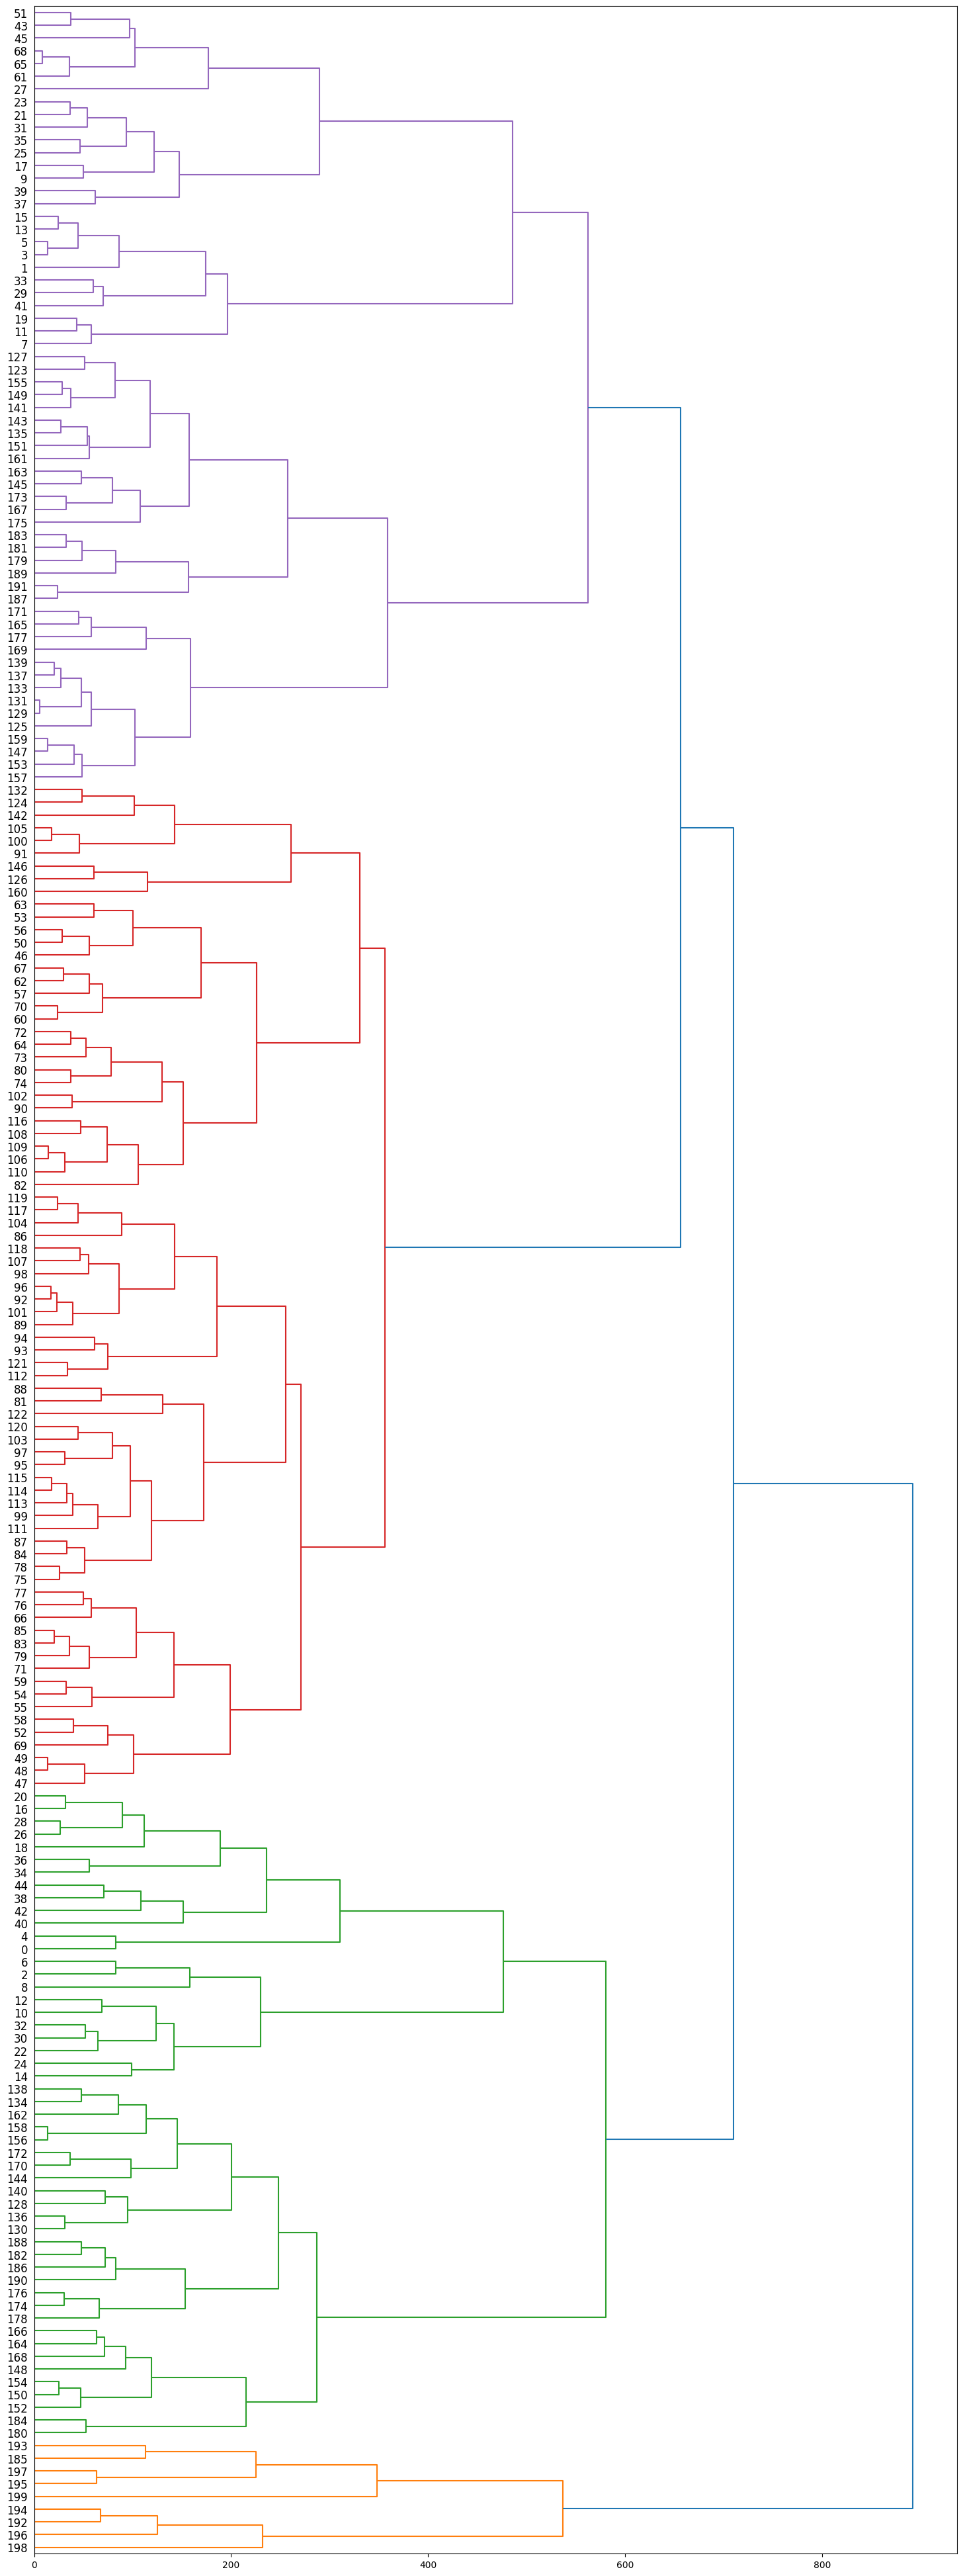

In [ ]:
# Import hierarchy module from scipy for clustering and distance_matrix for distance calculations
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

# Compute the distance matrix from the data X, which contains distances between each pair of points
dist = distance_matrix(X, X)
# Print the distance matrix to see the actual distances
print(dist)

# Perform hierarchical/agglomerative clustering with 'complete' linkage on the distance matrix
# 'Complete' linkage means that the maximum distance between observations of pairs of clusters is used
Z = hierarchy.linkage(dist, 'complete')

# Set up the matplotlib figure size for a large dendrogram
plt.figure(figsize=(18, 50))
# Generate and plot the hierarchical clustering as a dendrogram
# The orientation is set to 'right' so that the tree is horizontal and leaf labels are on the right
# Leaf rotation and font size are adjusted for clarity
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

Switching from 'complete' to 'average' linkage in Agglomerative Hierarchical Clustering changes how we measure the distance between clusters. 'Complete' linkage looks at the furthest points between clusters, while 'average' linkage calculates the mean distance. This often creates more balanced dendrograms by not focusing solely on the most distant points.

To see how this affects clustering, we change the linkage parameter to 'average' in the hierarchy linkage function and then redraw the dendrogram. Here's the code adjustment needed:

<ipython-input-18-54ae435f7a9c>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


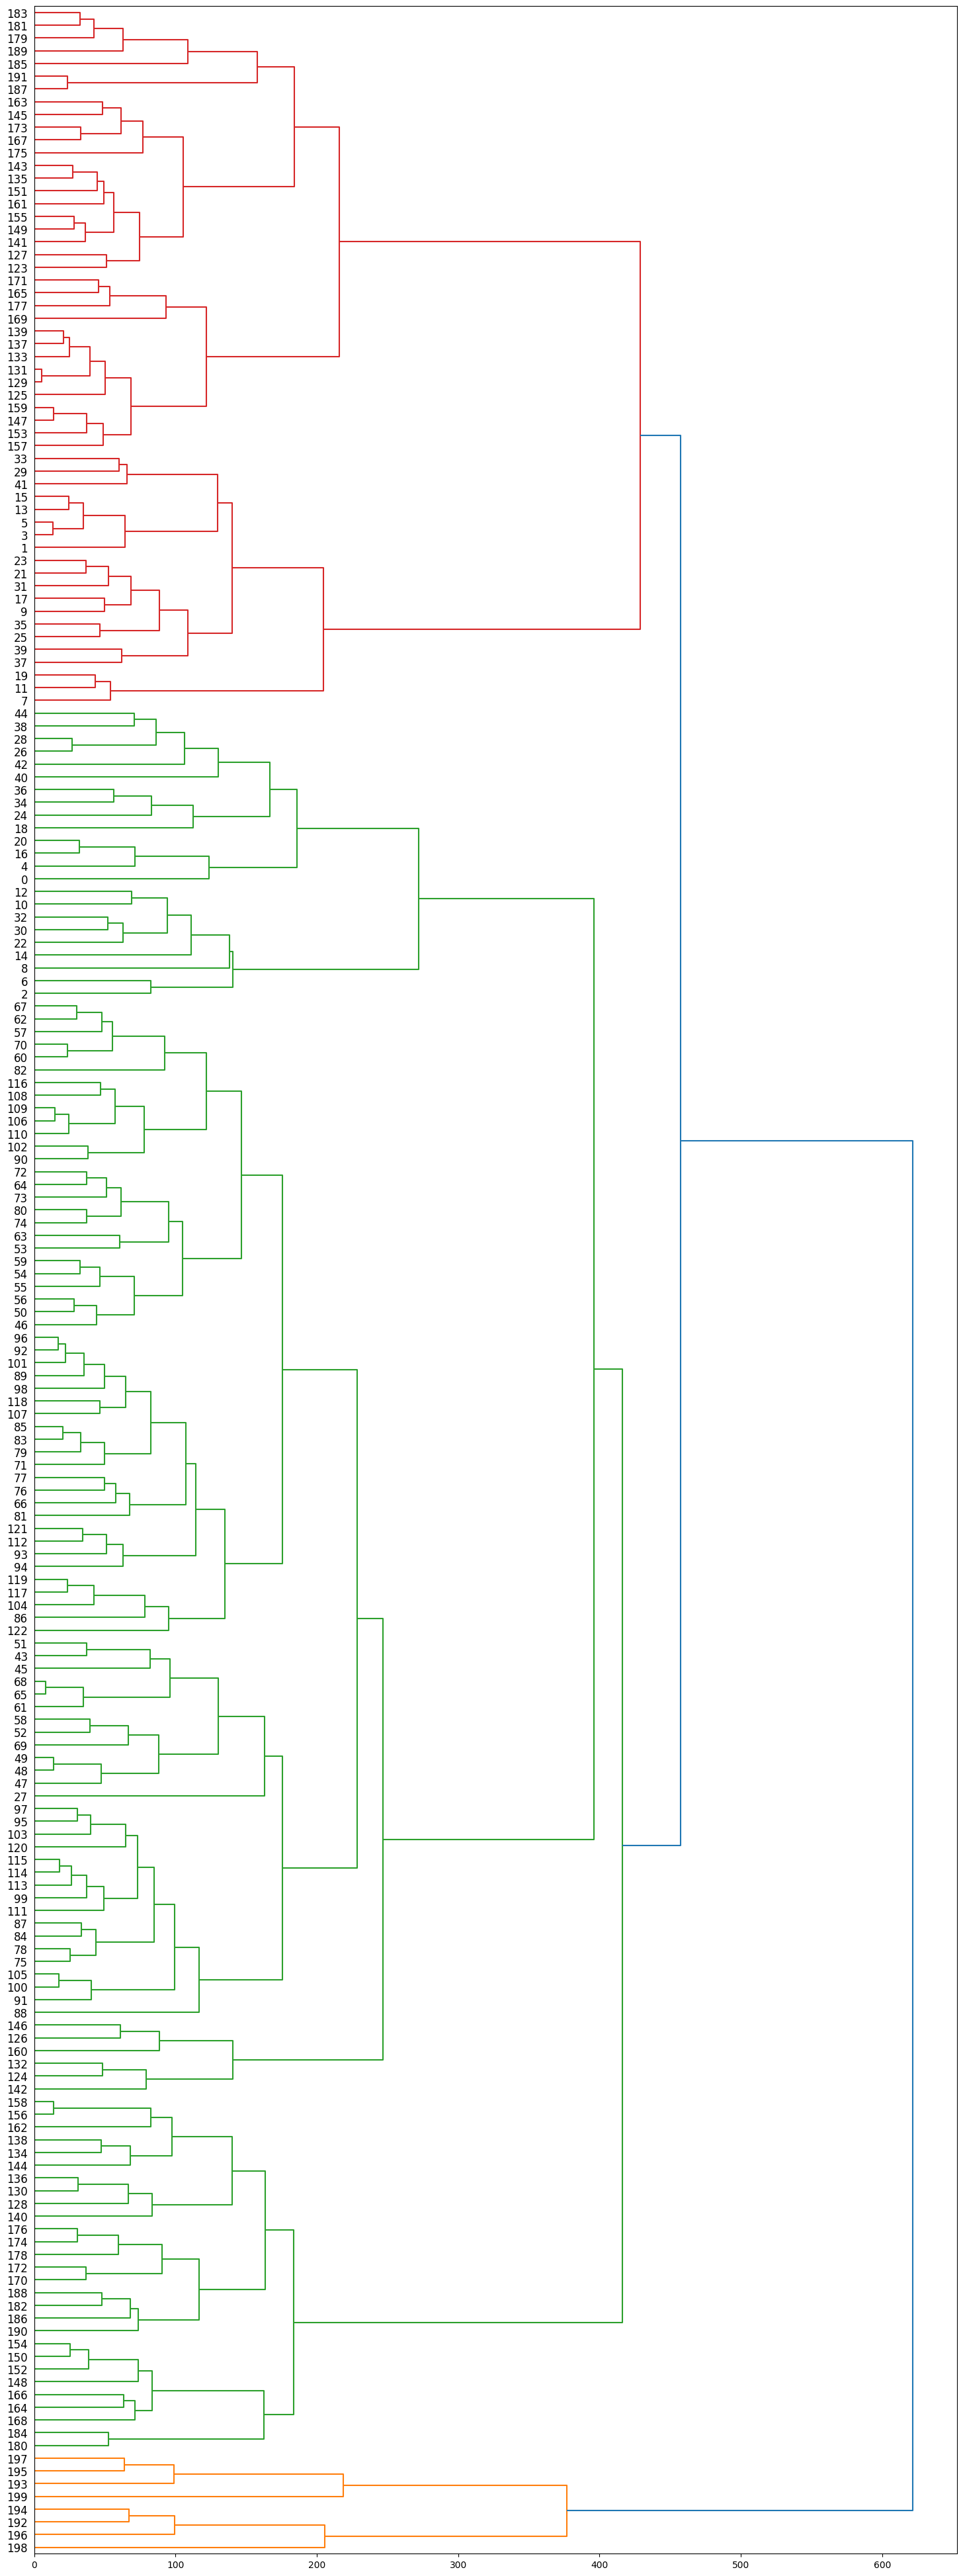

In [ ]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## ⌨️**Exercise**

1. Revise the code to compute and print a distance matrix using the distance_matrix function. Explain what X should contain.

**Hint**: X must be a dataset where each row is a data point, and each column is a feature..
2. Update the linkage method call to use a different linkage criterion ('ward', 'single', or 'average') and explain the impact on cluster formation.
3. Modify the dendrogram call to change the orientation to 'top' and adjust the leaf rotation and font size for better visibility. Discuss why orientation and readability adjustments are crucial for analysis.
---

<a name="section_4"></a>

# **4. Density-Based Spatial Clustering**


[Return to contents](#contents)


Following our exploration of K-means and Hierarchical Agglomerative Clustering, let's now introduce another clustering algorithm known as DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise. Unlike the previously discussed methods, DBSCAN doesn't require us to specify the number of clusters beforehand.

Here's what sets DBSCAN apart and what we can learn from it:

- **Density-Based**: DBSCAN groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions.
- **Noise Identification**: It is adept at identifying outliers as 'noise', which is a significant advantage over other clustering algorithms that may force every point into a cluster even if it doesn't belong to one.
- **Varied Cluster Shapes**: DBSCAN can find clusters of arbitrary shapes, whereas algorithms like K-means assume that clusters are spherical.
- **Minimal Input Parameter**s: DBSCAN primarily requires two parameters - the minimum number of points required to form a dense region (min_samples) and the maximum distance between two points for them to be considered as part of the same density area (eps).

Through DBSCAN, we can gain insights into the intrinsic clustering structure of our data without being bound by the constraint of pre-specifying the number of clusters, allowing for a more natural grouping based on data density.

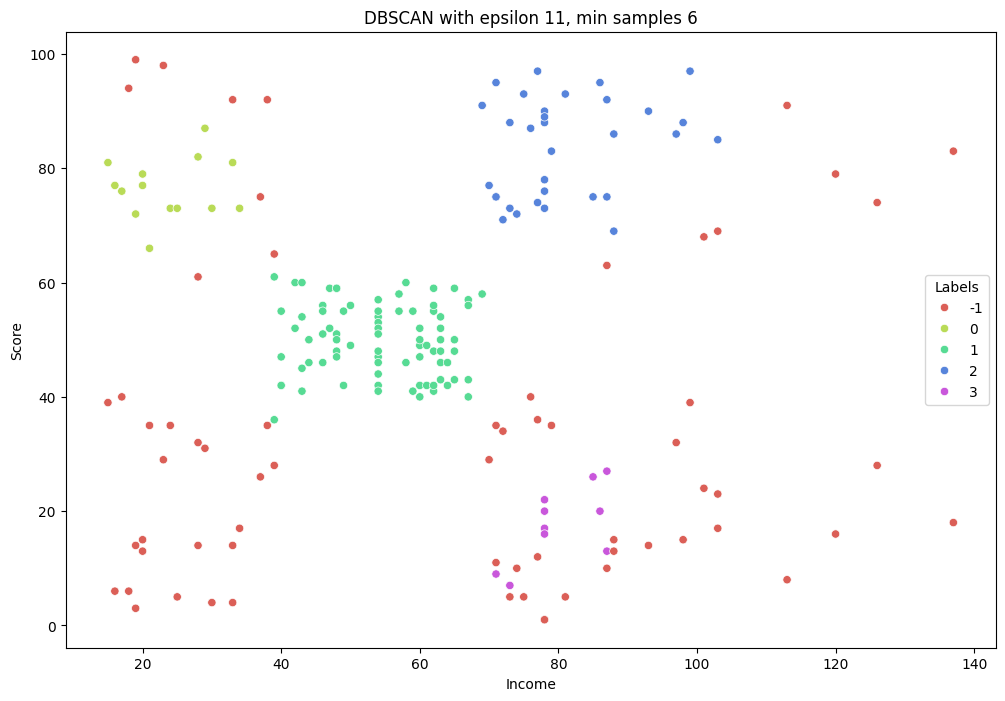

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Importing numpy for unique label count

# Assuming X is your DataFrame that contains the features 'Income' and 'Score'.

# Instantiate a DBSCAN object with an epsilon (eps) value of 11 and a minimum sample count of 6.
# Epsilon determines the maximum distance between two samples for them to be considered as in the same neighbourhood.
# min_samples sets the number of samples in a neighbourhood for a point to be considered as a core point.
db = DBSCAN(eps=11, min_samples=6).fit(X)

# Assign the cluster labels generated by the DBSCAN algorithm to a new column 'Labels' in your DataFrame.
# Cluster labels for each point are accessible through the labels_ attribute of the fitted model.
# Noise points are given the label -1.
X['Labels'] = db.labels_

# Prepare the figure for plotting, setting the size to 12 by 8 inches for better visibility.
plt.figure(figsize=(12, 8))

# Create a scatter plot using Seaborn. The 'Income' column is set as the x-axis, and 'Score' as the y-axis.
# The 'hue' parameter is used to color the points based on their cluster label for visual distinction.
# The palette is set to 'hls' (Hue, Lightness, Saturation) and is dynamically generated to match the number of unique labels (clusters plus noise).
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', len(np.unique(db.labels_))))

# Title the plot to indicate that it represents the DBSCAN clustering results.
plt.title('DBSCAN with epsilon 11, min samples 6')

# Display the plot.
plt.show()

It is can be seen that DBSCAN does not achieve optimal performance, attributed to the insufficient density within our dataset. The designation of label -1, indicating outliers, predominates, suggesting a high incidence of data points classified as such. Enhanced performance might have been attainable with a larger dataset.

## ⌨️**Exercise**

1. Modify the DBSCAN instantiation in the given code by changing the eps value to 0.5 and min_samples to 5. Discuss how these changes might affect the clustering results.
2. Experiment with different values of eps and min_samples. Record how the number of clusters and outliers changes with different settings. What trends do you observe as you adjust each parameter?
3. Explain the significance of the eps parameter in the DBSCAN algorithm. How does increasing or decreasing this value impact the clustering outcome?
---

### **Lesson Summary and Clustering Tips (Some advanced tips might require external researhc)**

**Types of Clustering Algorithms**
- **K-means**: Popular for spherical clusters. However it is sensitivity to initialisation and outliers.
-**Hierarchical Clustering**: Creates a cluster hierarchy and has various linkage methods such as single, complete and average.
- **DBSCAN**: Density-based algorithm; good at handling noise and irregular cluster shapes.

**Feature Selection and Scaling**
- **Why Scaling Matters**: Clustering algorithms often rely on distance calculations. If features have wildly different scales, some features may dominate distance computations.
- **Common Techniques:** Standard scaling and normalisation as important part of pre-processing your data.

**Determining the Number of Clusters ('k')**
- **Elbow Method**: Plot within-cluster sum of squares (WCSS) vs. 'k' to visually find the "elbow" (where WCSS decrease slows down).
- **Silhouette Score**: Measures a point's fit within its cluster vs. neighboring clusters. High scores are better.

### **Evaluation and Improvement**

**Metrics Beyond Cluster Visualisation:**
- **Silhouette Score**: Provides a numerical quality check for cluster formations.
- **External Validation (if labels are available)**: Use metrics like Adjusted Rand Index or Purity to compare clustering results against existing labels.
- **Fine-tuning Parameters**: Many algorithms have adjustable hyperparameters. Demonstrate how changing these can affect results, encouraging experimentation.
- **Interpretation**: Try to understand what the clusters mean. Are there common trends within clusters? This turns an abstract grouping into insightful information.

**Practical Considerations**

- **Dealing with High Dimensionality:** Techniques like PCA or t-SNE can be vital before clustering. Otherwise, distances in high-dimensional data become less meaningful.
- **Imbalanced Clusters**: Real-world data can have clusters of wildly different sizes. Discuss if your chosen algorithm or resampling techniques might help cope with imbalance.
- **Computational Time**: Clustering can get computationally expensive for large datasets. Highlight sampling techniques or approximate clustering algorithms as options.

🔑 - Learn more about clustering algorithms and their implemtnation on the official Sci-kit Learn documentation - https://scikit-learn.org/stable/modules/clustering.html